In [3]:
# TODO, show differences related to post-selecting for depth vs post-selectng for total gates added
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric

In [4]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")
library = CircuitLibrary.from_txt("../../circuits/small_circuits.txt")
# library = CircuitLibrary.from_txt("qft.txt")

In [5]:
coupling_map = CouplingMap.from_heavy_hex(5)
total_work = 24
transpilers = [
    QiskitLevel3(coupling_map),  # 20,4,20
    SabreMS(
        coupling_map,
        name="SABREMS-MinSwaps",
        cost_function="basic",
        swap_trials=20,
        fixed_aggression=2,
        parallel=0,
    ),
    SabreMS(
        coupling_map,
        name="SABREMS-MinDepth",
        swap_trials=20,
        fixed_aggression=2,
        parallel=0,
    ),
]

metrics = [DepthMetric(consolidate=False), TotalMetric(consolidate=False)]

In [6]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=10,
)
benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/9 [00:00<?, ?it/s]

Loading toffoli_n3 from QASMBench


Circuits from library:  11%|█         | 1/9 [00:58<07:47, 58.48s/it]

Loading adder_n4 from QASMBench


Circuits from library:  22%|██▏       | 2/9 [02:30<09:06, 78.05s/it]

Loading fredkin_n3 from QASMBench


Circuits from library:  33%|███▎      | 3/9 [03:40<07:26, 74.49s/it]

Loading qaoa_n8 from MQTBench


Circuits from library:  44%|████▍     | 4/9 [06:58<10:15, 123.10s/it]

Loading dj_n8 from MQTBench


Circuits from library:  56%|█████▌    | 5/9 [08:53<08:00, 120.21s/it]

Loading qft_n8 from MQTBench


Circuits from library:  67%|██████▋   | 6/9 [13:29<08:40, 173.43s/it]

Loading qftentangled_n8 from MQTBench


Circuits from library:  78%|███████▊  | 7/9 [19:17<07:40, 230.47s/it]

Loading qpeexact_n8 from MQTBench


Circuits from library:  89%|████████▉ | 8/9 [23:47<04:02, 242.94s/it]

Loading ae_n8 from MQTBench


Circuits from library: 100%|██████████| 9/9 [27:59<00:00, 186.66s/it]


In [7]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -23.699674594053477,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'qaoa_n8'},
 'monodromy_total': {'average_change': -15.648527068450013,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'qaoa_n8'},
 'total_runtime': {'average_change': 6053.568392510155,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'dj_n8'}}

In [8]:
benchmark.summary_statistics(transpilers[1], transpilers[2])

{'monodromy_depth': {'average_change': -3.6127641635118812,
  'best_circuit': 'dj_n8',
  'worst_circuit': 'toffoli_n3'},
 'monodromy_total': {'average_change': 1.9890193875496653,
  'best_circuit': 'qftentangled_n8',
  'worst_circuit': 'dj_n8'},
 'total_runtime': {'average_change': 1.0895967105294868,
  'best_circuit': 'qpeexact_n8',
  'worst_circuit': 'dj_n8'}}

In [9]:
benchmark.summary_statistics(transpilers[0], transpilers[2])

{'monodromy_depth': {'average_change': -27.20683499711627,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'qaoa_n8'},
 'monodromy_total': {'average_change': -13.532276001609379,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'dj_n8'},
 'total_runtime': {'average_change': 6165.359731879732,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'dj_n8'}}

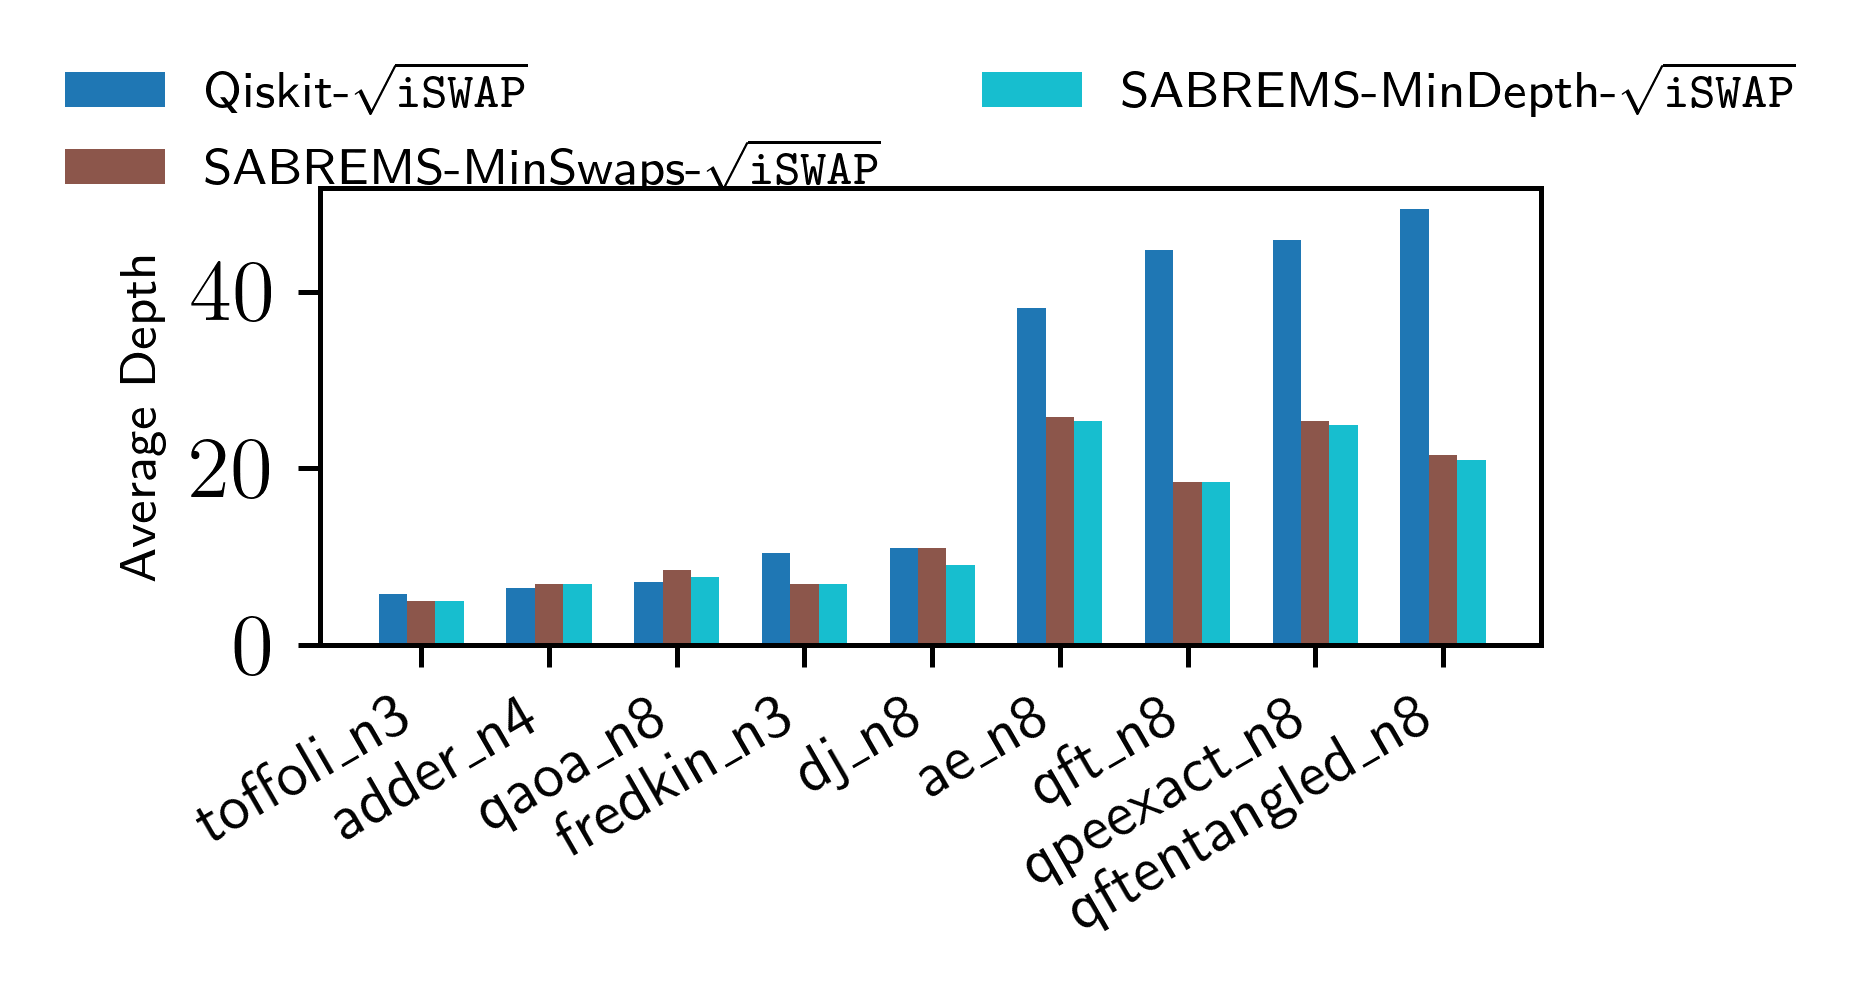

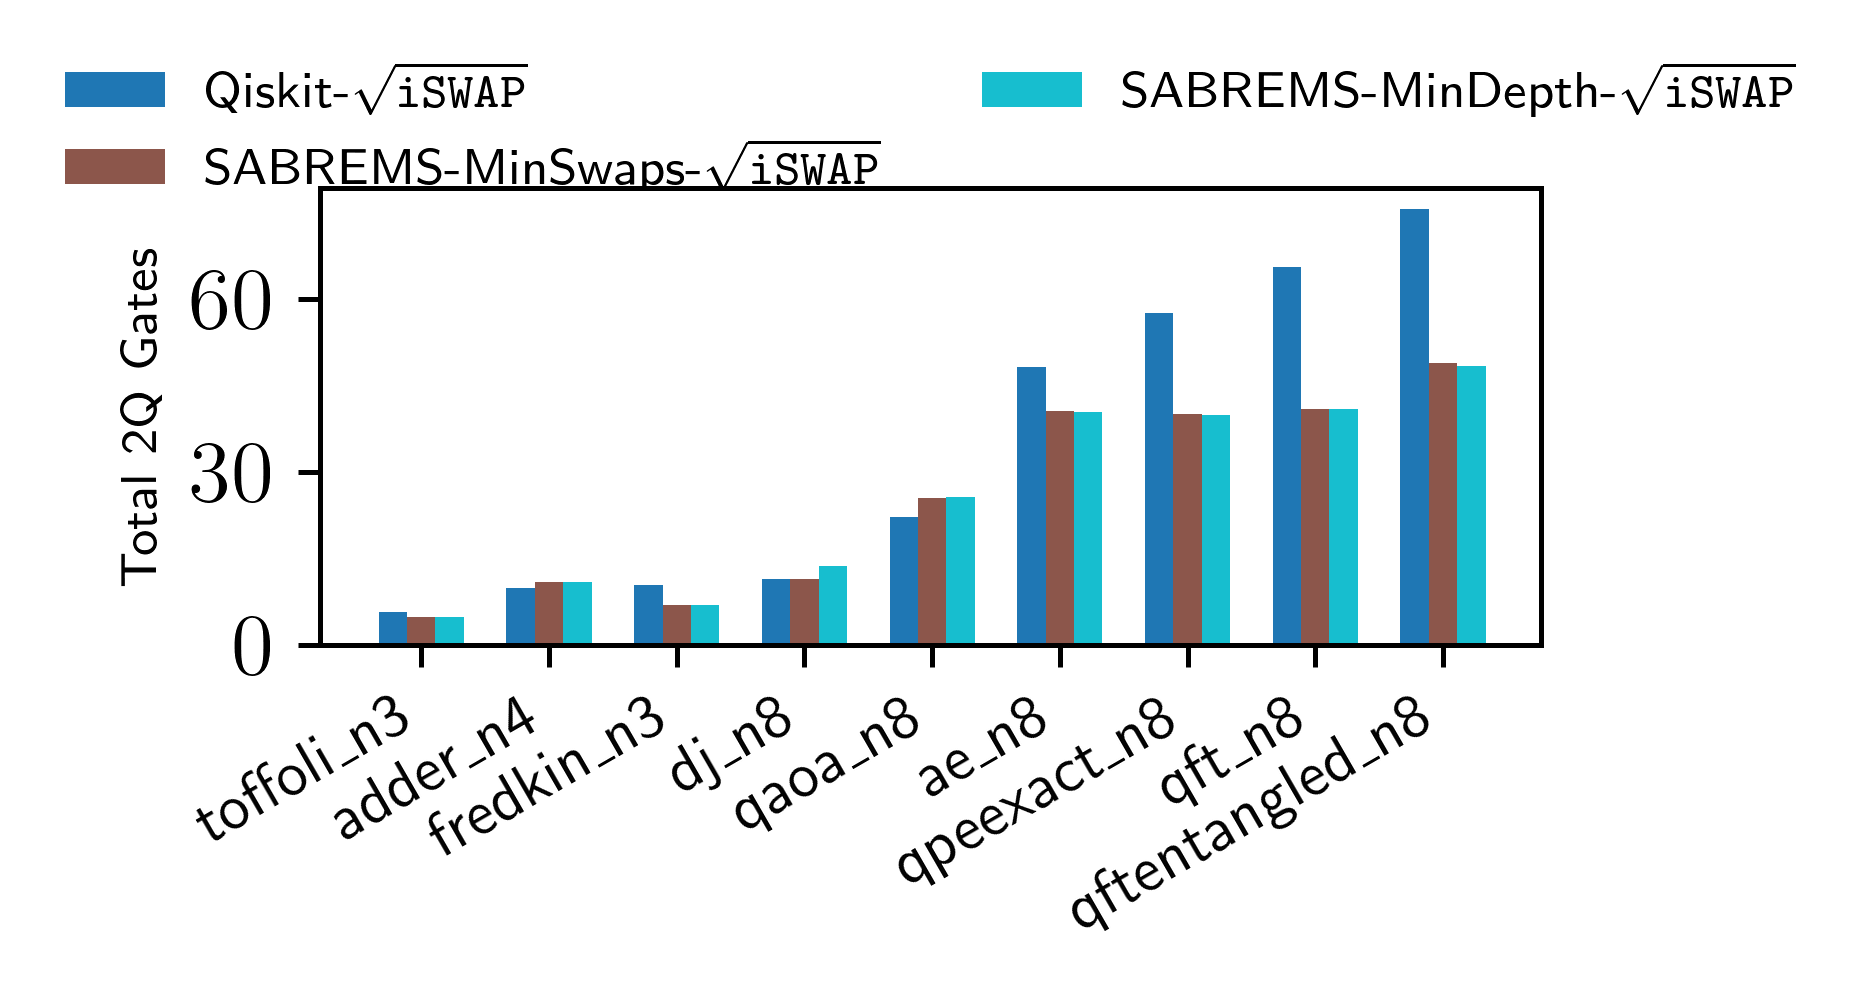

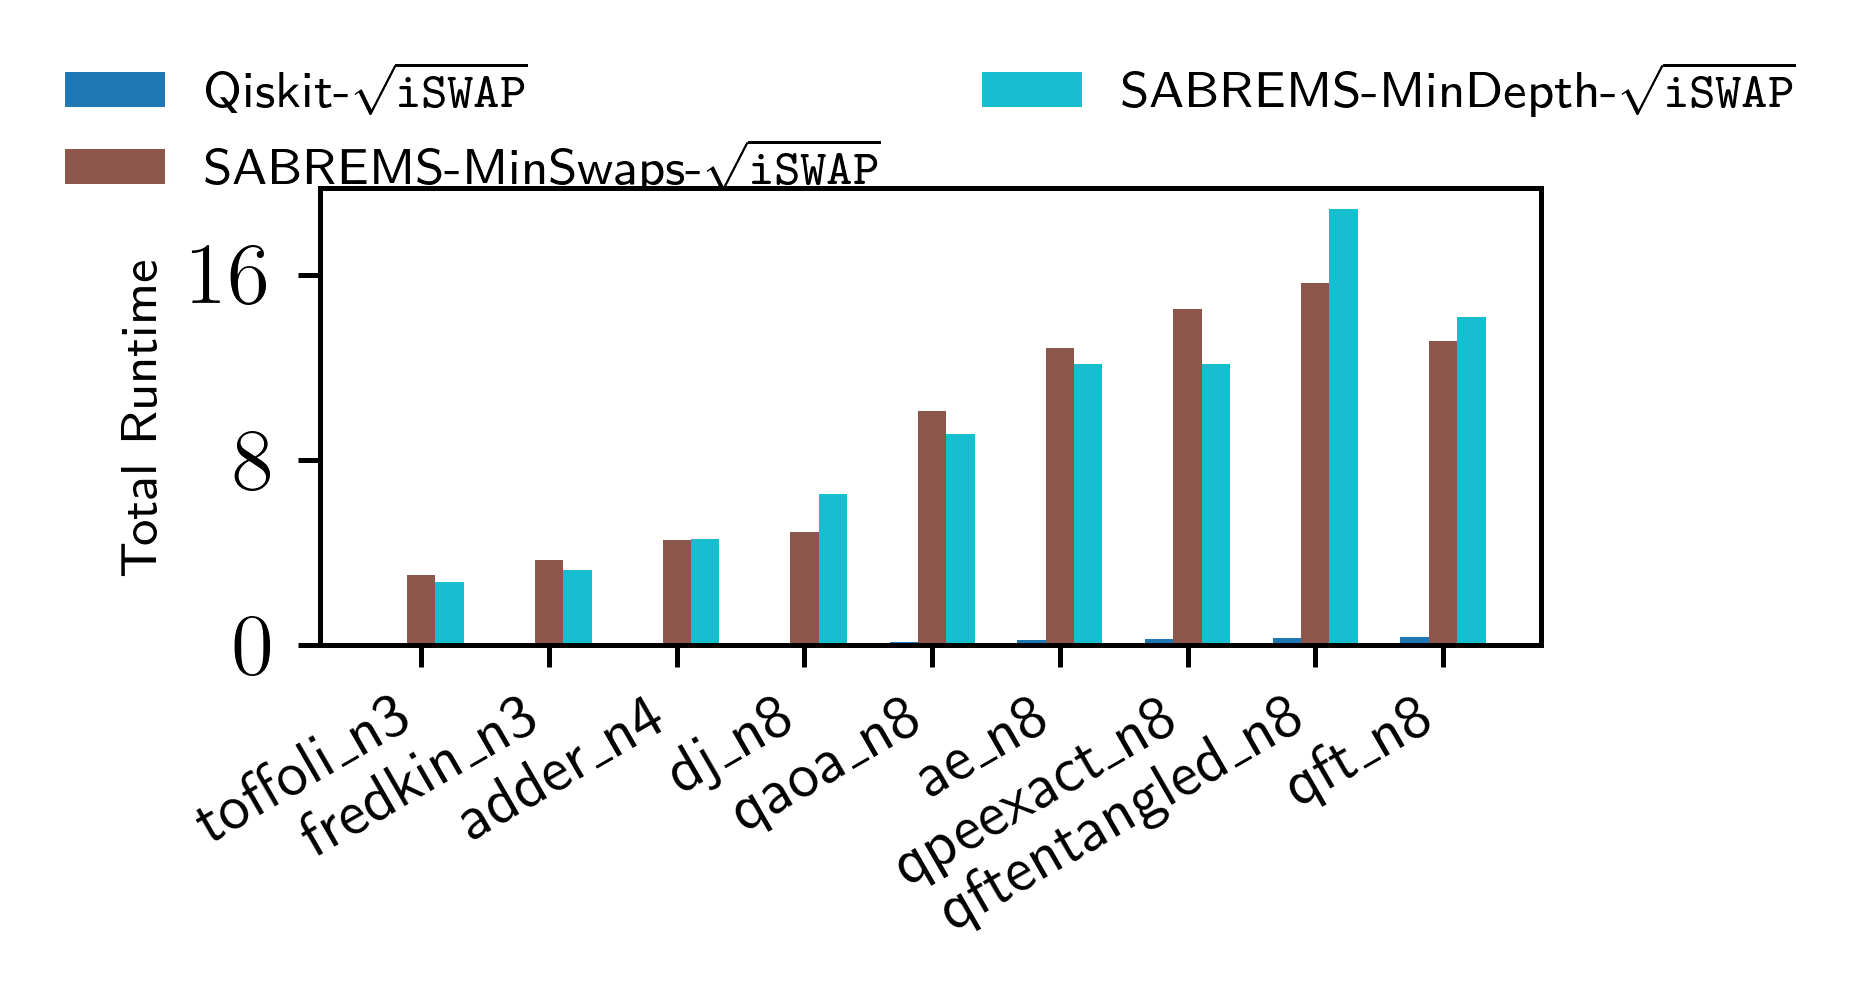

In [10]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="post")

In [11]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: monodromy_depth
  Circuit: adder_n4                                 Mean result: 6.500                          Trials: [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5]
  Circuit: ae_n8                                    Mean result: 38.165                         Trials: [40.5, 36.0, 37.0, 41.0, 41.0, 35.5, 42.5, 37.5, 36.0, 35.5]
  Circuit: dj_n8                                    Mean result: 11.063                         Trials: [11.5, 12.0, 11.5, 10.0, 10.0, 13.0, 10.5, 11.5, 10.5, 10.5]
  Circuit: fredkin_n3                               Mean result: 10.500                         Trials: [10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5]
  Circuit: qaoa_n8                                  Mean result: 7.137                          Trials: [7.0, 7.0, 7.0, 7.0, 7.0, 8.5, 7.0, 7.0, 7.0, 7.0]
  Circuit: qft_n8                                   Mean result: 44.729                         Trials: [43.0, 47.0, 39.5, 4